In [2]:
import os
import random

import cv2
import numpy as np
from PIL import Image
from utils.detect_line import *

cfg = get_cfg_defaults()
cfg.SAVE_DIR = f'workdir/run/{random.randint(0, 100000):06d}/'
os.makedirs(cfg.SAVE_DIR, exist_ok=True)
print(cfg)

DETECT:
  HEIGHT: 2048
  WIDTH: 2048
ELINE:
  ANGLE: 1
  EPS: 3
GET_LINKS_EPS: 1
MAX_CONTINUE: 10
SAVE_DIR: workdir/run/091810/


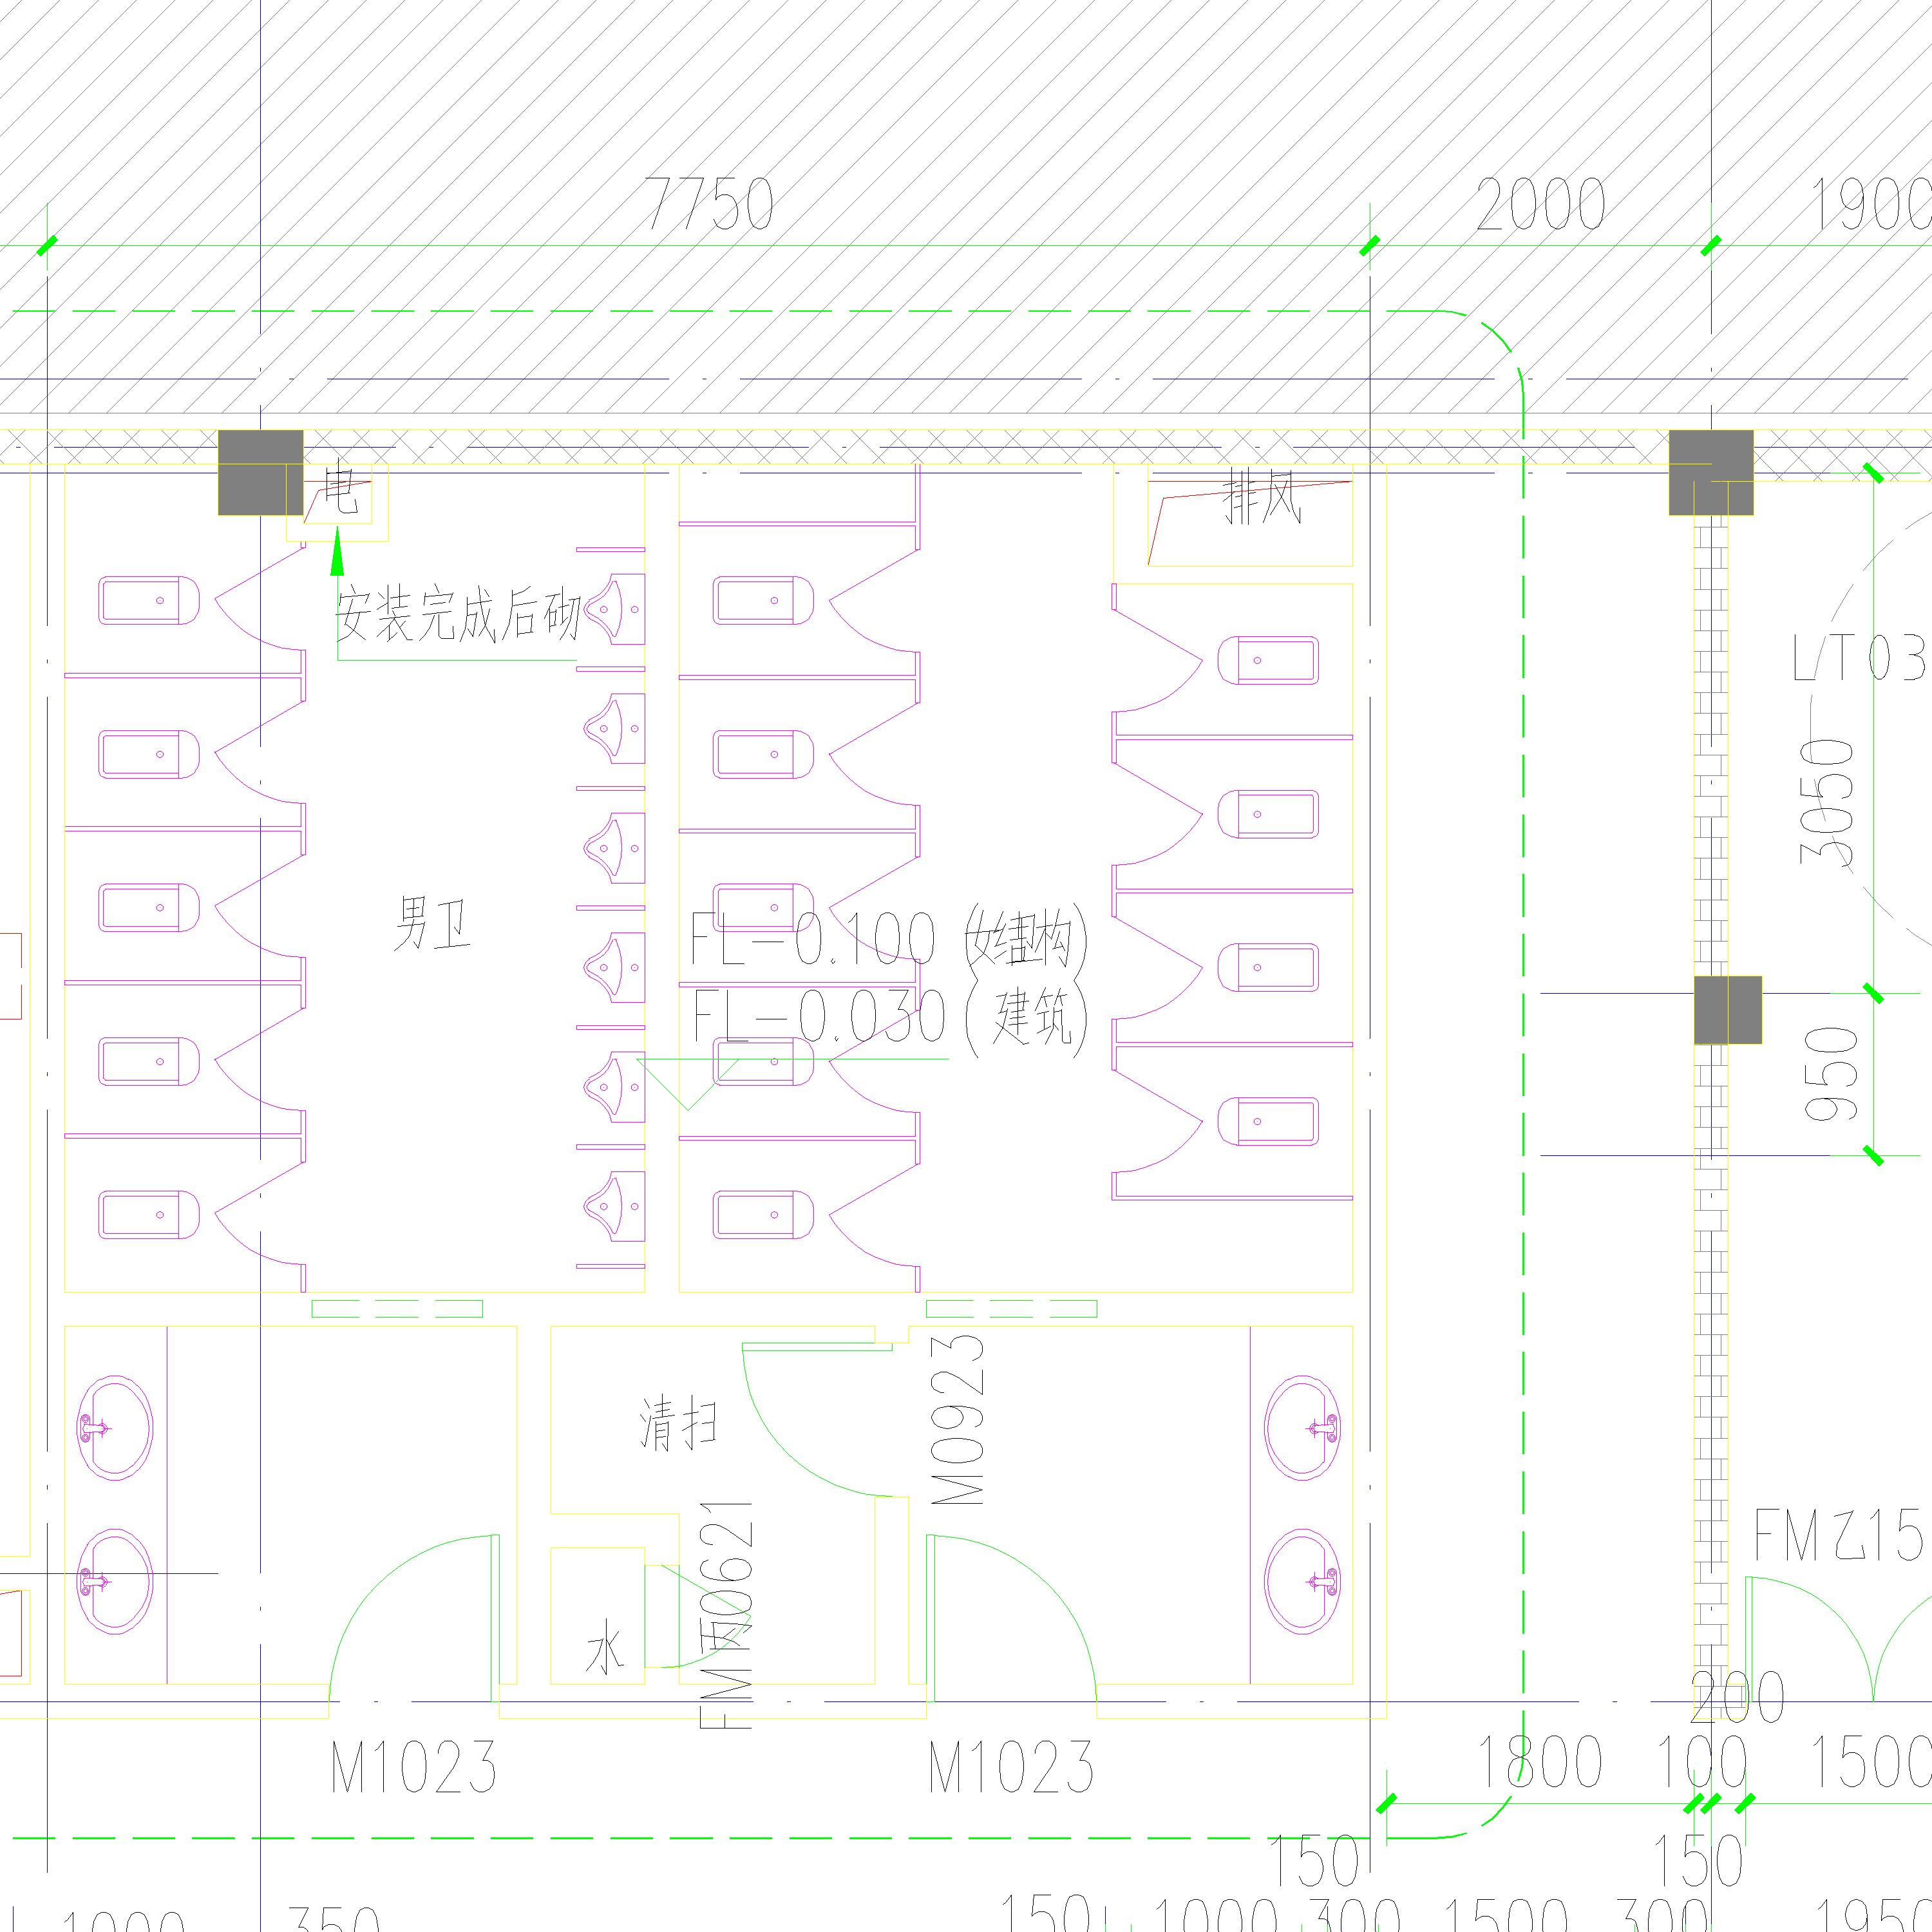

In [12]:
ori_img = cv2.imread("../src/1.png")
ori_img = ori_img[7000:10000, 19000:22000, :]  # 为了更快看到结果，只截取一部分
Image.fromarray(ori_img)

In [13]:
Image.fromarray(ori_img).save(cfg.SAVE_DIR + 'ori.png')

## 直线检测

In [14]:
lines, total_lines, all_elines = detect_lines(ori_img, cfg)

  0%|          | 0/4 [00:00<?, ?it/s]

In [20]:
qx_img = ori_img.copy()
white =np.ones_like(qx_img)*255
for line in lines:
    color = (255,255,255)
    pt1 = line[0]
    pt2 = line[1]
    cv2.line(qx_img, pt1, pt2, color, 1)
    cv2.line(white, pt1, pt2, line[2], 1)

Image.fromarray(qx_img).save(cfg.SAVE_DIR + 'delete_line.png')
Image.fromarray(white).save(cfg.SAVE_DIR + 'lines.png')
# Image.fromarray(qx_img)